In [1]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from sklearn.model_selection import KFold

In [13]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

<AxesSubplot:xlabel='label'>

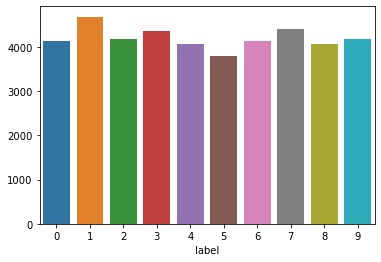

In [4]:
label_counts = train.groupby('label').label.count()
sns.barplot(x=label_counts.index, y=label_counts.values)

In [14]:
X_train = train.drop('label', axis=1)
y_train = train.copy().loc[:, ['label']]

In [11]:
#X_train = X_train / 255.0

In [16]:
X_tensor = tf.convert_to_tensor(X_train)
y_tensor = tf.convert_to_tensor(y_train)

In [54]:
X_tensor = tf.reshape(X_tensor, (X_tensor.shape[0], 28, 28, 1))
X_tensor.shape

TensorShape([42000, 28, 28, 1])

In [55]:
enc = OneHotEncoder(sparse=False)
y_encoded = enc.fit_transform(y_tensor)
y_encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])